In [1]:
from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

import matplotlib.pyplot as plt
import argparse
from utils import load_image, show_custom_channels, zoom_in, add_noise, \
                  simple_denoise, blur, simple_deblur, detect_cell_boundary, \
                  compute_cell_size
%matplotlib inline

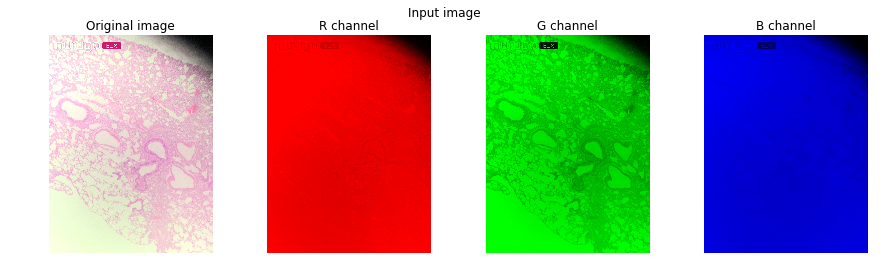

In [2]:
# Load one of these sample image, show different color channels.
img = load_image('samples/IMG_6567.JPG')
show_custom_channels(img, color_space='rgb', title='Input image')

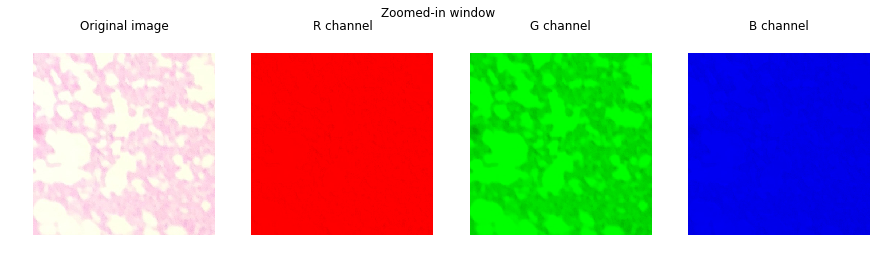

In [3]:
# Zoom in and show a small window to see triplet of color values for a
# 64x64 (or so) window
zoomed = zoom_in(img, 500, 500, height=500, width=500)
show_custom_channels(zoomed, color_space='rgb', title='Zoomed-in window')

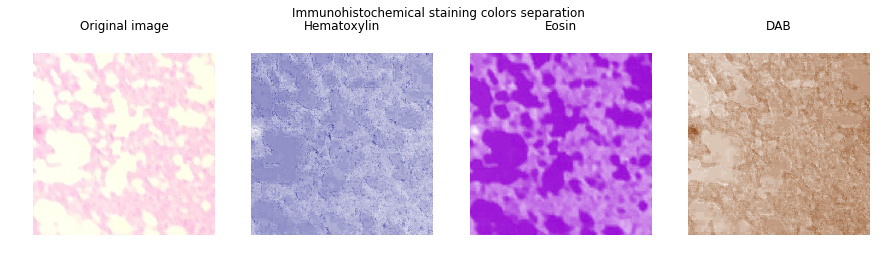

In [4]:
# Separate H&E color stain channels from the image
show_custom_channels(zoomed, color_space='hed',
                     title='Immunohistochemical staining colors separation')

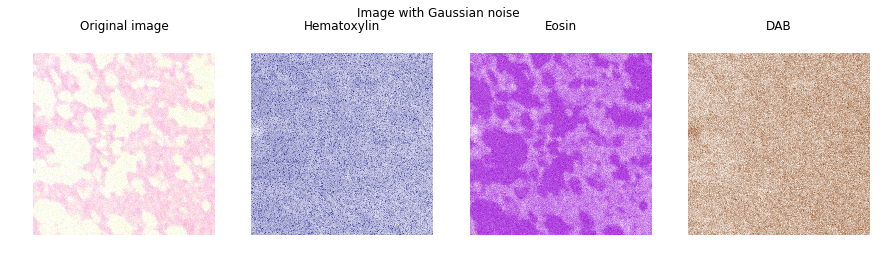

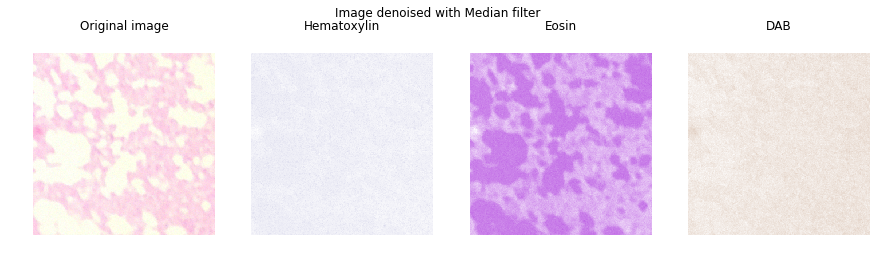

In [5]:
# Add noise and do a simple denoising task
noised = add_noise(zoomed, sigma=9)
denoised = simple_denoise(noised, kernel_size=3)
show_custom_channels(noised, color_space='hed',
                     title='Image with Gaussian noise')
show_custom_channels(denoised, color_space='hed',
                     title='Image denoised with Median filter')

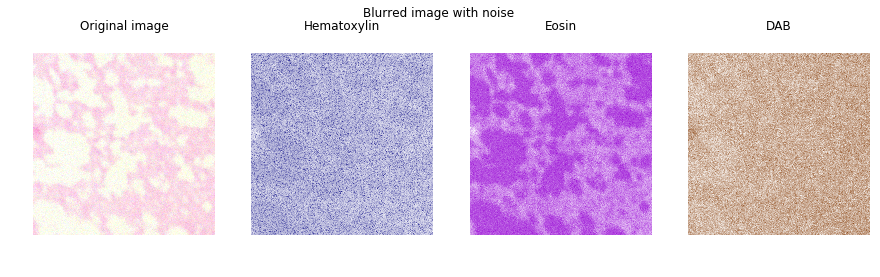

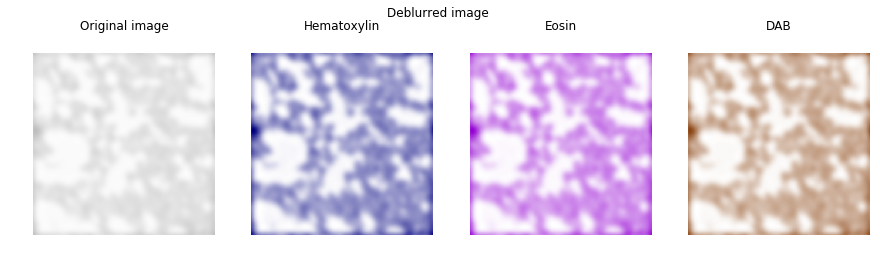

In [6]:
# Apply blurring and add noise and do a simple deblurring task, using the
# Wiener filter
blurred_noised = add_noise(blur(zoomed, block_size=9), sigma=9)
deblurred = simple_deblur(blurred_noised)
show_custom_channels(blurred_noised, color_space='hed',
                     title='Blurred image with noise')
show_custom_channels(deblurred, color_space='hed',
                     title='Deblurred image')

Text(0.5,0.98,u'Detected cell boundary')

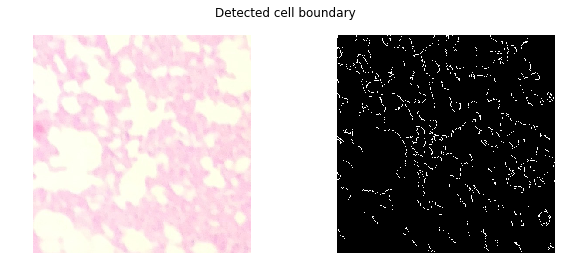

In [11]:
# Detect cell boundary and overlay the results on images
edges = detect_cell_boundary(zoomed, sigma=0.5)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(zoomed)
axes[1].imshow(edges, cmap='gray')
axes[0].axis('off')
axes[1].axis('off')
plt.suptitle('Detected cell boundary')

In [8]:
# Compute the average size of a cell